In [23]:
#!pip install tensorflow-gpu

In [24]:
import tensorflow as tf

In [25]:
print(tf.__version__)

2.8.2


In [26]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Deep Learning/ANN/Churn_Modelling/Churn_Modelling.csv")

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [29]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
# create dummy variable
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [31]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [32]:
X = pd.concat([X,geography,gender],axis=1)


In [33]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [34]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [35]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,LeakyReLU,Dropout


In [38]:
# Initializing the ANN
classifier = Sequential()


In [39]:
# Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [40]:
# Creating Hidden Layer 1
classifier.add(Dense(units=4,activation='relu'))

In [41]:
# Creating Hidden Layer 2
classifier.add(Dense(units=6,activation='relu'))

In [42]:
# Creating Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [43]:
# Optimizing
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model_history = classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.5270 - accuracy: 0.7679 - val_loss: 0.4462 - val_accuracy: 0.8129
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4231 - accuracy: 0.8212 - val_loss: 0.4161 - val_accuracy: 0.8228
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4015 - accuracy: 0.8324 - val_loss: 0.4028 - val_accuracy: 0.8285
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3846 - accuracy: 0.8447 - val_loss: 0.3862 - val_accuracy: 0.8364
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3671 - accuracy: 0.8548 - val_loss: 0.3675 - val_accuracy: 0.8463
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3573 - accuracy: 0.8543 - val_loss: 0.3595 - val_accuracy: 0.8485
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3513 - accuracy: 0.8571 - val_loss: 0.3559 - val_accuracy: 0.8478

In [45]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

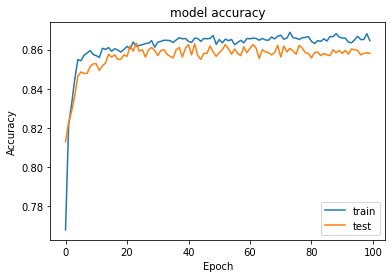

In [47]:
# Summarize history 
plt.plot(model_history.history['accuracy']) 
plt.plot(model_history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train','test']) 
plt.show() 

In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  min_delta=0,
                                                  patience=20,
                                                  verbose=1,
                                                  mode="auto",
                                                  baseline=None,
                                                  restore_best_weights=False) 

In [51]:
model_history = classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping) 

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3186 - accuracy: 0.8666 - val_loss: 0.3432 - val_accuracy: 0.8580
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3182 - accuracy: 0.8686 - val_loss: 0.3439 - val_accuracy: 0.8595
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8647 - val_loss: 0.3440 - val_accuracy: 0.8584
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3175 - accuracy: 0.8656 - val_loss: 0.3441 - val_accuracy: 0.8569
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3182 - accuracy: 0.8670 - val_loss: 0.3470 - val_accuracy: 0.8557
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3193 - accuracy: 0.8655 - val_loss: 0.3465 - val_accuracy: 0.8569
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3172 - accuracy: 0.8679 - val_loss: 0.3466 - val_accuracy: 0.8573